In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
debussy_file = "drive/My Drive/Colab Notebooks/piano_c.wav"

In [ ]:
ipd.Audio(debussy_file)

In [ ]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file)

**Frequency domain features**
Time-domain plots show signal variation with respect to time. Therefore, to analyze a signal in terms of frequency, the time-domain signal is converted into frequency-domain signals using transforms such as the Fourier transform or auto-regression analysis. We've already seen this implemented in previous time-domain feature extraction using STFTs.

**Chroma related features**
Chroma features are a powerful representation of music audio in which we use a 12-element representation of spectral energy called a chroma vector where each of the 12 bins represeent the 12 equal-tempered pitch class of western-type music (semitone spacing). It can be computed from the logarithmic short-time Fourier transform of the input sound signal, also called a chromagram or a pitch class profile.

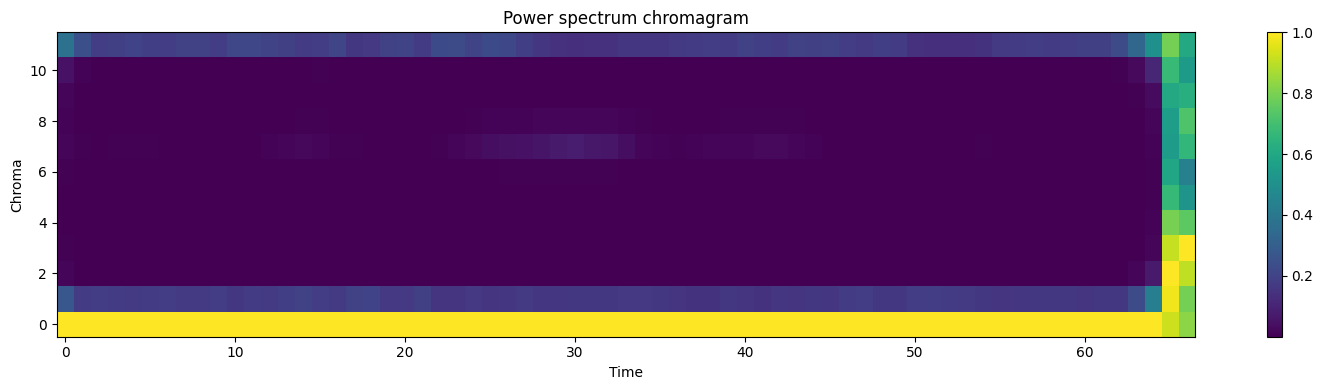

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load(debussy_file)

# Compute the Chromagram
chroma_d = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot the Chromagram
plt.figure(figsize=(15, 4))
plt.imshow(chroma_d, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Power spectrum chromagram')
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.tight_layout()
plt.show()

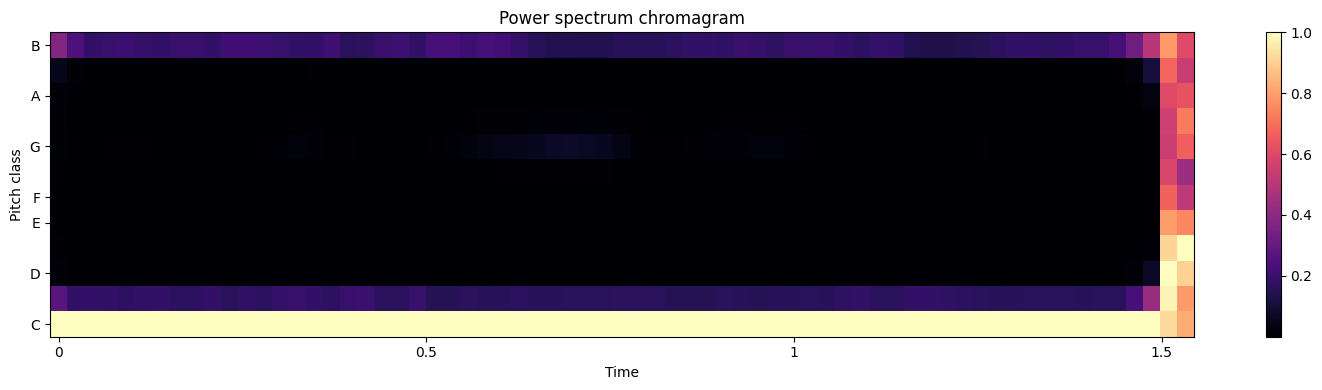

In [ ]:
chroma_d = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma_d, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Power spectrum chromagram')
plt.tight_layout()
plt.show()

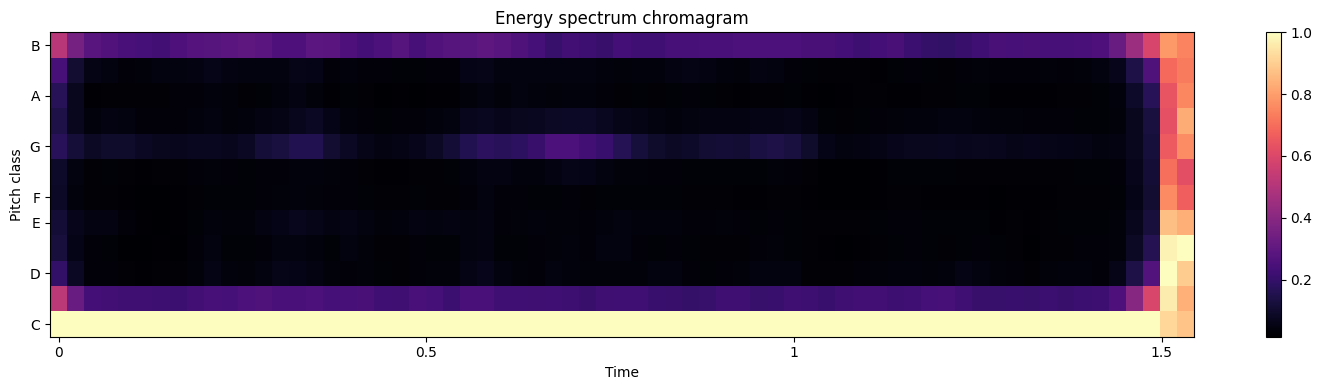

In [ ]:
# using an energy (magnitude) spectrum
S = np.abs(librosa.stft(y)) # apply short-time fourier transform
chroma_e = librosa.feature.chroma_stft(S=S, sr=sr)

plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma_e, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Energy spectrum chromagram')
plt.tight_layout()
plt.show()

**Tonality-based features**
The tonal sounds of a harmonic stationary audio signal is actually the fundamental frequency (FF). The more technical definition of the FF is that it is the first peak of the local normalized spectrotemporal auto-correlation function (english translation: the lowest frequency of a periodic waveform). FF is an important feature for music onset detection, audio retrieval, and sound type classification.

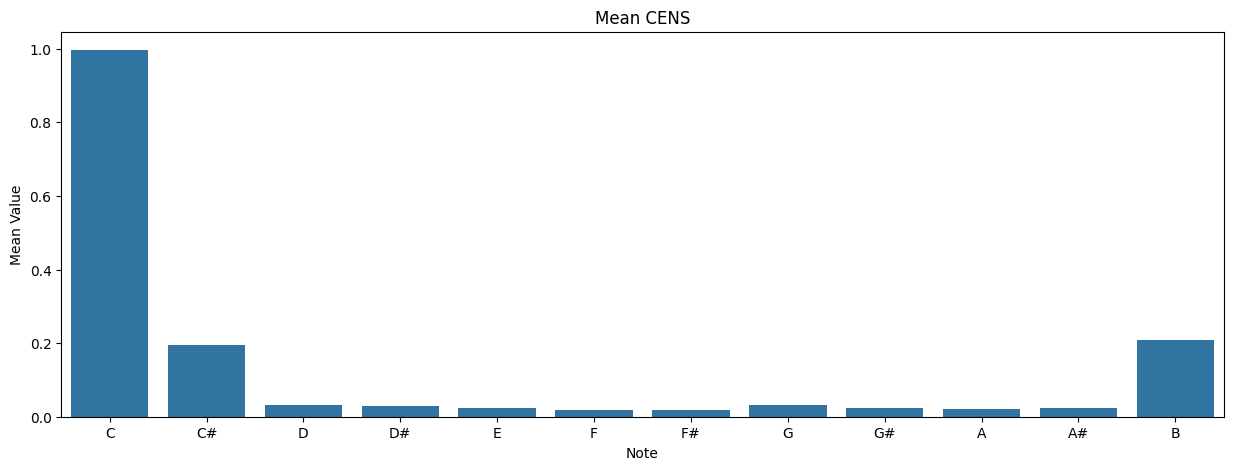

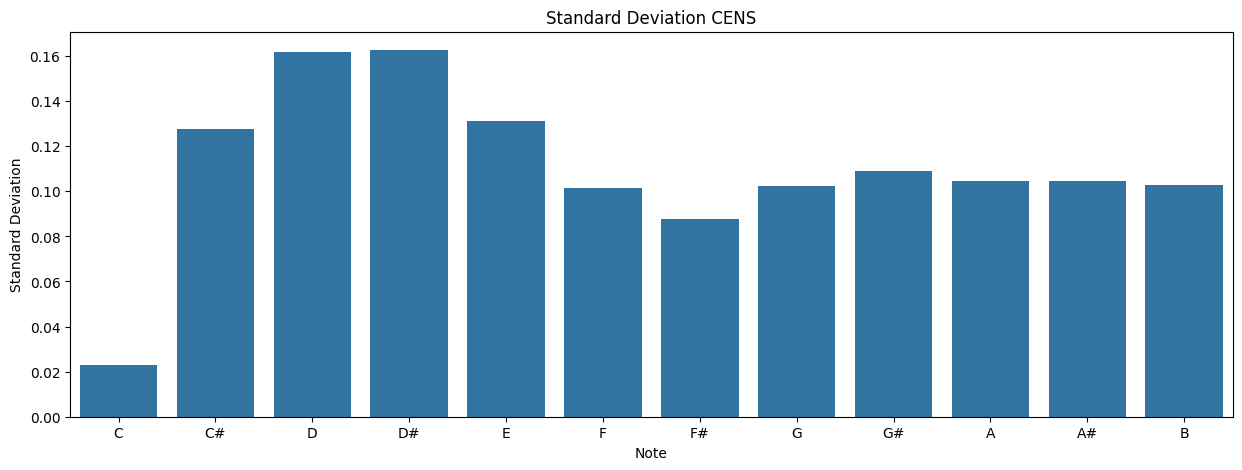

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the audio file
y, sr = librosa.load(debussy_file)

# Compute the Chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Compute the mean and standard deviation of CENS
chroma_mean = np.mean(chroma, axis=1)
chroma_std = np.std(chroma, axis=1)

# Plot the summary
octave = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Plot Mean CENS
plt.figure(figsize=(15, 5))
plt.title('Mean CENS')
sns.barplot(x=octave, y=chroma_mean)
plt.xlabel('Note')
plt.ylabel('Mean Value')
plt.show()

# Plot Standard Deviation CENS
plt.figure(figsize=(15, 5))
plt.title('Standard Deviation CENS')
sns.barplot(x=octave, y=chroma_std)
plt.xlabel('Note')
plt.ylabel('Standard Deviation')
plt.show()


**Spectrum shape based features**


**Spectral centroid**
The spectral centroid is a measure to characterize the "center of mass" of a given spectrum. Perceptually, it has a robust connection with the impression of sound "brightness". Timbre researchers formalize brightness as an indication of the amount of high-frequency content in a sound.

The spectral centroid is calculated as the weighted means of the frequencies present in a given signal, determined using a Fourier transform, with the frequency magnitudes as the weights.

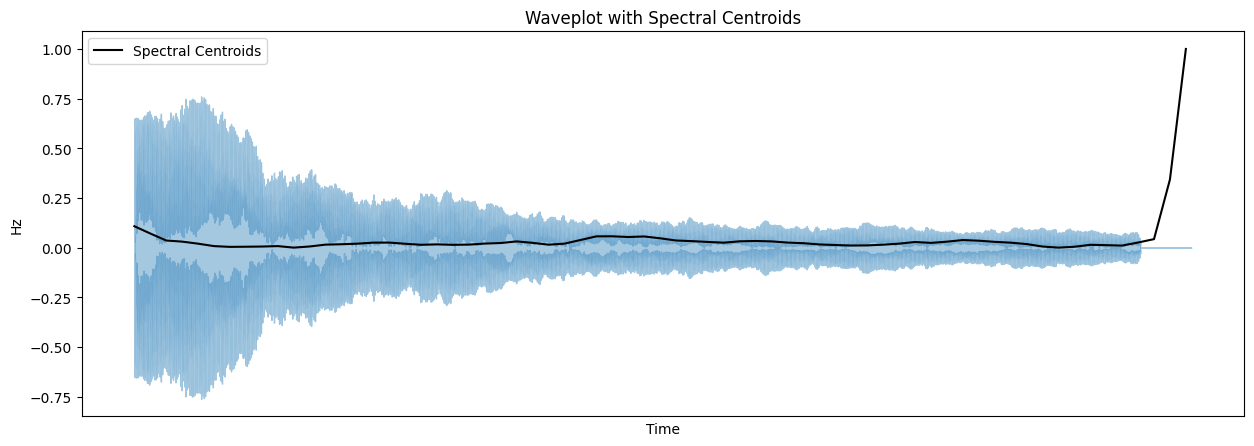

In [ ]:
import librosa
import librosa.display
import sklearn.preprocessing
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load(debussy_file)

# Compute spectral centroids
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Compute the time variable for visualization
frames = range(len(spectral_centroids))
f_times = librosa.frames_to_time(frames)

# An auxiliary function to normalize the spectral centroid for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plot the waveplot and spectral centroids
plt.figure(figsize=(15, 5))

# Plot the waveplot
plt.subplot(1, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.4)

# Plot the spectral centroids
plt.plot(f_times, normalize(spectral_centroids), color='black', label='Spectral Centroids')

plt.ylabel('Hz')
plt.xticks([])
plt.legend()
plt.title('Waveplot with Spectral Centroids')
plt.show()


**Spectral contrast**
Octave-based Spectral Contrast (OSC) was developed to represent the spectral characteristics of a musical piece. It considers the spectral peak and valley in each sub-band separately.

In general, spectral peaks correspond to harmonic components and spectral valleys correspond to non-harmonic components or noise in a music piece. Therefore, the difference between spectral peaks and spectral valleys will reflect the spectral contrast distribution.

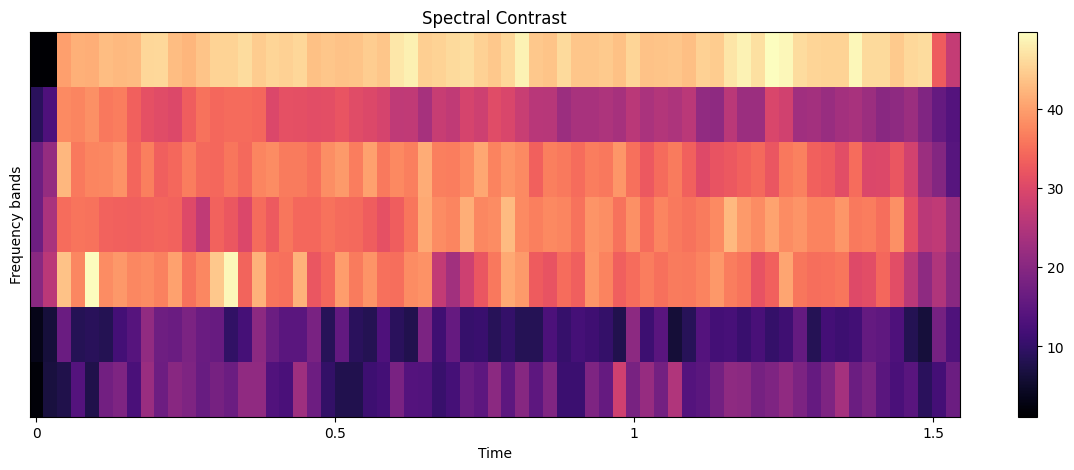

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Assuming y_harmonic is the harmonic component of your audio signal
# (you might have computed it previously using librosa.effects.harmonic)
y_harmonic, _ = librosa.effects.hpss(y)

# Compute spectral contrast
contrast = librosa.feature.spectral_contrast(y=y_harmonic, sr=sr)

# Plot the spectral contrast
plt.figure(figsize=(15, 5))
librosa.display.specshow(contrast, x_axis='time', sr=sr)
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral Contrast')
plt.xlabel('Time')
plt.show()


**Spectral Rolloff**
Spectral rolloff point is defined as the Nth percentile frequency of the power spectral distribution, where N is usually 85% or 95%. The rolloff point is the frequency below which the N% of the magnitude distribution is concentrated.

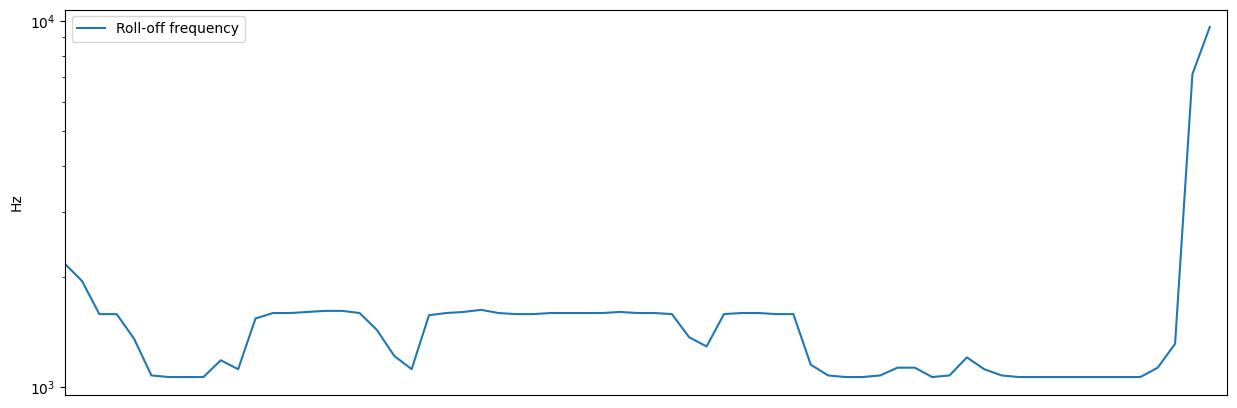

In [ ]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

**Mel-frequency cepstral coefficients (MFCCs)**


Mel-frequency cepstral coefficients represent the short-time power an audio clip based on the discrete cosine transform of the log power spectrum on a non-linear mel scale. The difference between a cepstrum and the mel-frequency cepstrum (MFC) is that in the MFC, the frequency bands are equally spaced on the mel scale to more closely resemble the human auditory system's response as opposed to the linearly-spaced bands in the normal spectrum. This frequency warping allows for better representation of sound and is especially useful in audio compression.

Text(0.5, 1.0, 'MFCCs')

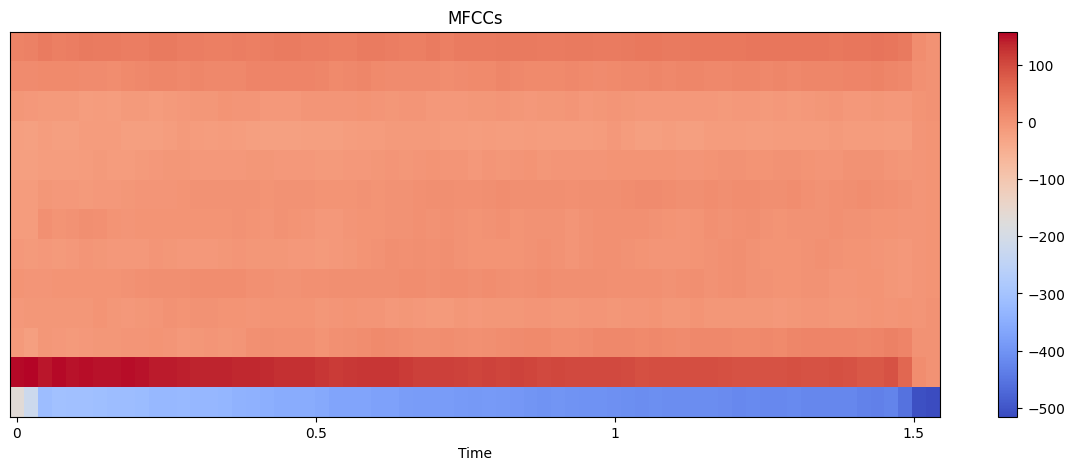

In [ ]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)

plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')